![techCompanies](tech_salaries_analysis.jpg) 

# Introduction
In a world where a cheeseburger no longer costs a quarter, or the even more dejecting reality that less and less of the affluent can afford personal yachts, the value of the dollar has become less and more concurrently.  Less valuable, because the purchasing power of the dollar has diminished, but more valuable because it is more important than ever to squeeze each dollar out of income sources.  In order to combat this reality, and add to the wealth of knowledge surrounding potentially increasing an individual’s income, we are analyzing the tech companies salary dataset.

This dataset consists of information corresponding to individuals with technology centered careers. The data includes general demographic information about the individual, such as education level, years of experience, sex, and race.  For income data, the dataset provides values for metrics such as base salary and total yearly compensation.  Examples of company level information provided include the name of the company and position.  
We will also be merging the dataset with a dataset of current stock market statistics.  This will focus our population on United States based public companies, which in turn will create a more accurate and useful model. This dataset will allow us to analyze variables like the market cap group, a categorical grouping of companies based on the number of outstanding shares multiplied by the stock price.  Other metrics include the number of employees currently employed by the company, the revenue per employee generated, the industry of the company, the sector of the company, and debt growth year over year.

# Objectives
The purpose of our exploration is to find what variables have an impact on tech centered career salaries, how strong the impact of those variables are, and make a prediction as to what salary an individual can potentially expect based on the value of variables that have an impact on salary.  The expectations of this analysis are that variables such as years of experience, market cap group, and revenue per employee have a strong influence on predicting the salary of an individual.

# Stakeholders
As for the stakeholders of our analysis, any individual, current or potential, looking to apply for tech related positions can use our analysis to focus their job search efforts using the metrics that have been found to be most effective in predicting salary to increase their potential salary.  This analysis can be bought or funded by companies similar to LinkedIn, who have a large stake in the analysis and trends of the job market. By gaining a better understanding of the driving factors of salaries, companies can implement initiatives to attract certain markets, ultimately contributing to the overall growth of the industry and the economy at large. 

# Research Questions
The main question we want to answer is what variables can influence the salary of an individual with a technology centered career in the United States.  Finding an answer to this question will give an individual the ability to tailor career decisions in a way to increase the probability of receiving a higher level of compensation.  We expect that the most influential factors include the years of experience an individual has, the size of the company they are working in, and the revenue generated by the company.  This will be analyzed through correlation statistics throughout the data analysis process.

We would like to also answer the question of how strong of a relationship do significant variables have in predicting one’s income within technology centric careers based in the United States.  We expect years of experience to have the largest impact in predicting one’s income.  In order to test this hypothesis, we will be looking at the correlation statistics between years of experience and base salary, as well as the value of the calculated coefficient of years of experience in a multivariate linear regression model.


![processing](data_processing.png) 

In [1231]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [1232]:
# Load the dataset
df = pd.read_csv('tech_companies_salary.csv')
df.shape

(62642, 29)

In [1233]:
df.head(3)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [1234]:
# Number of null values in each column
df.isna().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

### Dropping categorical data with null values

>Dropping the data with null values in the gender, education, company, race, tag, and level columns, cleans up the data in order to look at the relationship of these variables on salaries.  

>These values cannot be replaced without adversely affecting other category values.

In [1235]:
# Remove rows with null values in subset columns
df = df.dropna(subset=['gender', 'Education', 'company', 'Race', 'tag', 'level'])
df.shape

(21515, 29)

## Function to split the location column into city and state columns.

Locations with more than 2 strings delimited by a comma will be set to null values.  These locations correspond to locations outside of the United States.

Limiting our scope of the data to within the U.S. will increase the accuracy and usefulness of our model, as well as eliminate some outliers in the data.

In [1236]:
def split_location(loc):
    location = loc.split(', ')  
    if len(location) == 2:
        city = location[0]
        state = location[1]
    else:
        city = None
        state = None
    return pd.Series([city, state])

# apply function to dataframe
df[['City', 'State']] = df['location'].apply(split_location)
# Remove rows with null values in State column
df = df.dropna(subset='State')

### Verification of Categorical Values

In [1237]:
df.State.unique()

array(['CA', 'WA', 'TX', 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO', 'FL',
       'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN', 'LA',
       'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK', 'NV',
       'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI', 'NH',
       'NM', 'ND', 'VT', 'WY', 'ME'], dtype=object)

In [1238]:
df.Education.unique()

array(['PhD', "Bachelor's Degree", "Master's Degree", 'Some College',
       'Highschool'], dtype=object)

In [1239]:
df.Race.unique()

array(['Asian', 'Two Or More', 'White', 'Hispanic', 'Black'], dtype=object)

In [1240]:
df.title.unique()

array(['Software Engineer', 'Software Engineering Manager',
       'Hardware Engineer', 'Product Designer', 'Management Consultant',
       'Product Manager', 'Solution Architect', 'Sales',
       'Technical Program Manager', 'Data Scientist', 'Recruiter',
       'Mechanical Engineer', 'Business Analyst', 'Human Resources',
       'Marketing'], dtype=object)

![stocks](stocks_data.png) 

In [1241]:
stocks_df = pd.read_csv('screener-stocks.csv')
stocks_df.head(3)

,Symbol,Company Name,Market Cap,Stock Price,% Change,Industry,PE Ratio,Ent. Value,MC Group,Sector,...,Oper. Margin,Pretax Margin,Profit Margin,R&D / Rev,Avg. Volume,Rel. Volume,RSI,Tax / Revenue,Rev Gr. This Q,Rev Gr. Next Q
0,FLWS,1-800-FLOWERS.COM,6.965698e+08,10.92,1.11%,Specialty Retail,NaN,7.024748e+08,Small-Cap,Consumer Discretionary,...,-2.89%,-3.39%,-3.24%,3.20%,420598.0,77.96%,59.81,-0.15%,-5.95%,-3.19%
1,VCXB,10X Capital Venture Acquisition Corp. III,1.421026e+08,10.77,NaN,Shell Companies,63.35,1.420773e+08,Micro-Cap,Financials,...,NaN,NaN,NaN,NaN,10038.0,0.12%,60.96,NaN,NaN,NaN
2,TXG,10x Genomics,4.316825e+09,36.89,1.77%,Health Information Services,NaN,4.023500e+09,Mid-Cap,Healthcare,...,-42.88%,-40.21%,-41.23%,43.69%,1403080.0,74.62%,34.24,1.02%,7.41%,8.17%


In [1242]:
# Reformatting company values to uppercase representation eliminates redundant values in the tech salaries datase
# This also provides a category for a merge of both datasets
df['company'] = df['company'].apply(lambda company: company.upper())
stocks_df['company'] = stocks_df['Company Name'].apply(lambda company: company.upper())

#Removal of the reference to ticker GOOGL, in order to merge data corresponding solely on ticker symbol GOOG.
stocks_df.drop(stocks_df.loc[stocks_df['Symbol']=='GOOGL'].index, inplace=True)

### Editing Company Names
>Here we are reassigning many of the most common company names in the tech salaries dataset.

>These values are being changed to a value that aligns with the company names in the screener stock dataset.

In [1243]:
df.loc[ df['company'] == 'GOOGLE', 'company'] = 'ALPHABET'
df.loc[ df['company'] == 'AMAZON', 'company'] = 'AMAZON.COM'
df.loc[ df['company'] == 'FACEBOOK', 'company'] = 'META PLATFORMS'
df.loc[ df['company'] == 'PAYPAL', 'company'] = 'PAYPAL HOLDINGS'
df.loc[ df['company'] == 'HSBC', 'company'] = 'HSBC HOLDINGS'
df.loc[ df['company'] == 'APPLE INC.', 'company'] = 'APPLE'
df.loc[ df['company'] == '2U', 'company'] = '2U, INC.'
df.loc[ df['company'] == 'ABBOTT', 'company'] = 'ABBOTT LABORATORIES'
df.loc[ df['company'] == '8X8', 'company'] = '8X8, INC.'
df.loc[ df['company'] == 'ADP', 'company'] = 'Automatic Data Processing'.upper()
df.loc[ df['company'] == 'AFFIRM', 'company'] = 'AFFIRM HOLDINGS'
df.loc[ df['company'] == 'AMD', 'company'] = 'ADVANCED MICRO DEVICES'
df.loc[ df['company'] == 'INTEL CORPORATION', 'company'] = 'INTEL'
df.loc[ df['company'] == 'IBM', 'company'] = 'INTERNATIONAL BUSINESS MACHINES'
df.loc[ df['company'] == 'CAPITAL ONE', 'company'] = 'CAPITAL ONE FINANCIAL'
df.loc[ df['company'] == 'CISCO', 'company'] = 'CISCO SYSTEMS'
df.loc[ df['company'] == 'JPMORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'UBER', 'company'] = 'UBER TECHNOLOGIES'
df.loc[ df['company'] == 'GOLDMAN SACHS', 'company'] = 'THE GOLDMAN SACHS GROUP'
df.loc[ df['company'] == 'WALMART LABS', 'company'] = 'WALMART'
df.loc[ df['company'] == 'EBAY', 'company'] = 'EBAY INC.'
df.loc[ df['company'] == 'VISA', 'company'] = 'VISA INC.'
df.loc[ df['company'] == 'LYFT', 'company'] = 'LYFT, INC.'
df.loc[ df['company'] == 'SAP', 'company'] = 'SAP SE'
df.loc[ df['company'] == 'DELL', 'company'] = 'DELL TECHNOLOGIES'
df.loc[ df['company'] == 'BOEING', 'company'] = 'THE BOEING COMPANY'
df.loc[ df['company'] == 'GENERAL MOTORS', 'company'] = 'GENERAL MOTORS COMPANY'
df.loc[ df['company'] == 'T-MOBILE', 'company'] = 'T-MOBILE US'

### Initial merge of the data sets

In [1244]:
agg_df = pd.merge(df, stocks_df, on="company", how="left")


counts = agg_df['company'].value_counts()
print('Top 10 companies with the most representation: \n')
print(counts.head(10))
print('\nSymbol column nulls: ' + str(agg_df['Symbol'].isna().sum()))

Top 10 companies with the most representation: 

company
AMAZON.COM                         2090
MICROSOFT                          1299
ALPHABET                           1104
META PLATFORMS                      867
APPLE                               569
ORACLE                              309
INTEL                               303
INTERNATIONAL BUSINESS MACHINES     277
CAPITAL ONE FINANCIAL               267
CISCO SYSTEMS                       262
Name: count, dtype: int64

Symbol column nulls: 5093


### Eliminating Remaining Null Values

To eliminate the remaining null values of the symbol column, the entries were researched and a symbol was manually entered into the dataset. 
> Private companies were assigned "PRIVATE"

> Public companies only traded on international exchanges were assigned "INTERNATIONAL"

> Government operated companies were left null

> Remaining ambiguous companies were left null

> Subsidiaries were assigned the ticker symbol corresponding to their respective parent company.

These categories will be dropped from our analysis to focus the scope of our population.

This dataset was then merged on the "Symbol" column to fill in missing values and the dataset was saved as final_aggregated_df.csv.

Column names were updated in order to follow a uniform naming convention.

# Import of Aggregated Dataset

In [1260]:
df = pd.read_csv('final_aggregated_df.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,total_yearly_compensation,base_salary,bonus,company,city_id,location,state,city,...,pretax_margin,profit_margin,research_development_over_revenue,average_volume,relative_volume,rsi,tax_over_revenue,revenue_growth_this_quarter,revenue_growth_next_quarter,sex
0,5928,0,400000,210000,45000,ALPHABET,7472,"Sunnyvale, CA",CA,Sunnyvale,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
1,10063,1,136000,124000,11000,MICROSOFT,11521,"Redmond, WA",WA,Redmond,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
2,5929,2,337000,177000,36000,ALPHABET,7413,"San Bruno, CA",CA,San Bruno,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male


In [1261]:
df.shape

(16903, 92)

In [1262]:
# drop entries with null values in the symbol column removes ambiguous and government operated companies
df = df.dropna(subset='symbol')

# drop entries where symbol is international
public_companies = df.drop(df[df['symbol'] == 'INTERNATIONAL'].index)

# drop entries where sympol is private
public_companies = public_companies.drop(public_companies[public_companies['symbol'] == 'PRIVATE'].index)

public_companies.shape

(14208, 92)

In [1263]:
# Subsetting columns to be included in analysis
public_companies = public_companies[['base_salary', 'total_yearly_compensation', 'title', 'years_of_experience', 
                                     'years_at_company', 'education', 'race', 'sex', 'mc_group', 'sector', 
                                     'industry', 'employees', 'revenue_per_employee', 'profit_per_employee',
                                     'cash_over_market_cap', 'debt_growth_year_over_year', 'rsi']]

In [1264]:
public_companies.head(3)

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,sex,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,rsi
0,210000,400000,Software Engineer,5,5,PhD,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
1,124000,136000,Software Engineer,3,2,Bachelor's Degree,Two Or More,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
2,177000,337000,Software Engineer,6,6,Bachelor's Degree,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81


In [1265]:
public_companies.isna().sum()

base_salary                     0
total_yearly_compensation       0
title                           0
years_of_experience             0
years_at_company                0
education                       0
race                            0
sex                             0
mc_group                        0
sector                          0
industry                        0
employees                      11
revenue_per_employee           32
profit_per_employee            22
cash_over_market_cap            0
debt_growth_year_over_year    144
rsi                             8
dtype: int64

# Data Normalization

Reducing the scale of the numbers in the data will aid in finding a relationship between variables.

In [1266]:
# New columns are created corresponding to original columns with values divided by 100k
public_companies['total_yearly_compensation_norm'] = public_companies['total_yearly_compensation'].div(100000).round(8)
public_companies['base_salary_norm']               = public_companies['base_salary'].div(100000).round(8)
public_companies['employees_norm']                 = public_companies['employees'].div(100000).round(8)
public_companies['revenue_per_employee_norm']      = public_companies['revenue_per_employee'].div(100000).round(8)
public_companies['profit_per_employee_norm']       = public_companies['profit_per_employee'].div(100000).round(8)

In [1267]:
public_companies.loc[:,['total_yearly_compensation','total_yearly_compensation_norm',
                        'base_salary', 'base_salary_norm', 'employees', 'employees_norm',
                        'revenue_per_employee', 'revenue_per_employee_norm',
                        'profit_per_employee', 'profit_per_employee_norm']].sample(3)

,total_yearly_compensation,total_yearly_compensation_norm,base_salary,base_salary_norm,employees,employees_norm,revenue_per_employee,revenue_per_employee_norm,profit_per_employee,profit_per_employee_norm
4395,173000,1.73,129000,1.29,1525000.0,15.250,376908.0,3.76908,19951.0,0.19951
16848,96000,0.96,88000,0.88,33400.0,0.334,751437.0,7.51437,335180.0,3.35180
6440,260000,2.60,160000,1.60,1525000.0,15.250,376908.0,3.76908,19951.0,0.19951


In [1268]:
# columns with percentages as entries are reformatted and divided by 100
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year'].str.rstrip('%')
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].astype(float)
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].div(100).round(8)
public_companies['cash_over_market_cap_norm']       = public_companies['cash_over_market_cap'].str.rstrip('%')
public_companies['cash_over_market_cap_norm']       = public_companies['cash_over_market_cap_norm'].astype(float)
public_companies['cash_over_market_cap_norm']       = public_companies['cash_over_market_cap_norm'].div(100).round(8)

In [1269]:
public_companies.loc[:,['debt_growth_year_over_year', 'debt_growth_year_over_year_norm', 'cash_over_market_cap', 'cash_over_market_cap_norm']].sample(3)

,debt_growth_year_over_year,debt_growth_year_over_year_norm,cash_over_market_cap,cash_over_market_cap_norm
15951,0.77%,0.0077,5.23%,0.0523
15467,-4.17%,-0.0417,-22.46%,-0.2246
12209,17.16%,0.1716,-13.65%,-0.1365


![exploratory](exploratory.png) 

# Refining Variables

### In this section, we will be evaluating the variables we are using to predict base salary.  Our goal is to minimize the number of variables and maximize the effectiveness of the remaining variables.

In [1273]:
#creating dataset with variables of interest
public_companies = public_companies[['base_salary_norm', 'years_of_experience', 'employees_norm', 'revenue_per_employee_norm',
                                     'education', 'title', 'race', 'sex', 'mc_group', 'sector']]

>Profit per employee has a collinear relationship with revenue per employee.  Profit per employee is a function of revenue per employee and influenced by external factors like debt taken on by a company for the given year.  This makes it a less reliable predictor, therefore we are dropping it from the variables of interest.

>Years at company has a collinear relationship with years of experience, however years of experience is a more reliable metric due to its holistic nature.  It is for this reason we are dropping years at company from the variables of interest.

>RSI, or the relative strength index is a metric for evaluating if a stock is overbought or oversold.  This is a function of stock price and volume over time.  RSI is a time sensitive metric and with little direct relationship to predicting base salary, therefore we are dropping it from the dataset.

> Cash over market cap is a measure of the cash a company has on hand relative to the market cap of the stock.  The market cap is the number of outstanding shares times the stock price.  Because of the proportional property of this metric we are dropping it from the dataset in lieu of more direct variables like revenue per employee.

> Debt growth year over year is also a time sensitive metric.  Given that our dataset has entries dating back to 2016 and our stock market data is current, we have eliminated this from being a variable of interest.

# Numerical Data: Summary Statistics and Visualizations

In [1274]:
#Function to remove outliers based on IQR
def removeOutliersIQR(df, column):

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    iqr = q3 - q1
    upperThreshold = q3 + (1.5 * iqr)
    lowerThreshold = q1 - (1.5 * iqr)
    
    df = df[(df[column] <= upperThreshold) & (df[column] >= lowerThreshold)]    
    
    return df

## Quantitative Individual Level Data

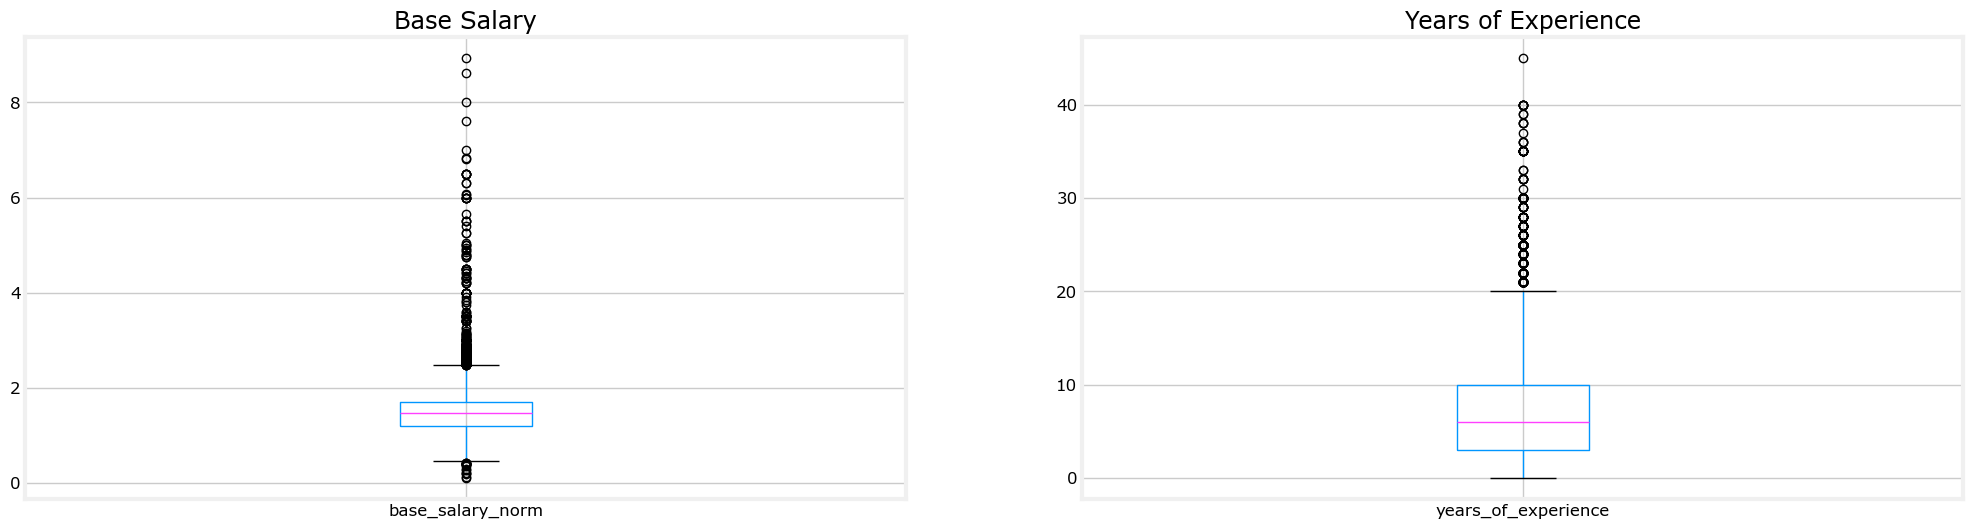

In [1275]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(25)

public_companies.boxplot(column='base_salary_norm', ax=ax[0])
ax[0].set_title('Base Salary')

public_companies.boxplot(column='years_of_experience', ax=ax[1])
ax[1].set_title('Years of Experience')

plt.show()

In [1276]:
# remove outliers
public_companies = removeOutliersIQR(public_companies, 'base_salary_norm')
public_companies = removeOutliersIQR(public_companies, 'years_of_experience')

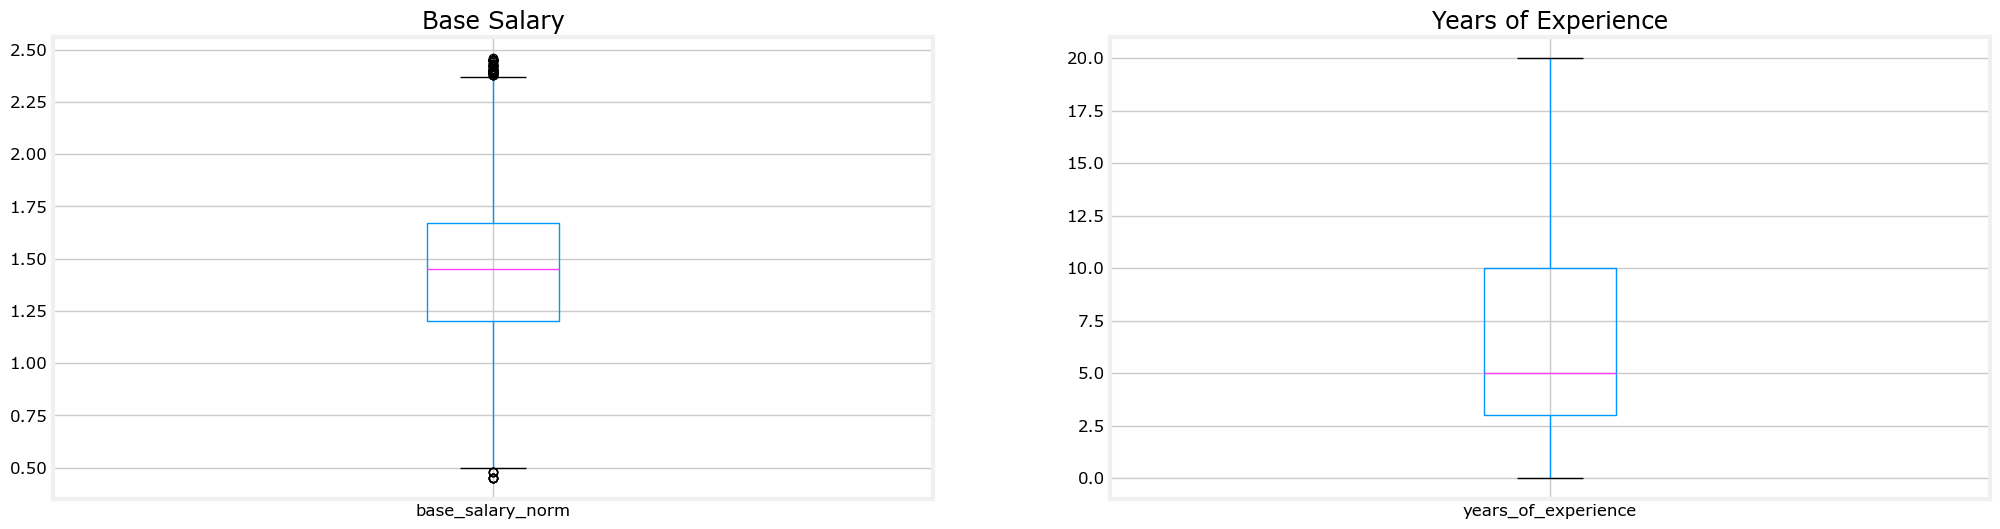

In [1277]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(25)

public_companies.boxplot(column='base_salary_norm', ax=ax[0])
ax[0].set_title('Base Salary')

public_companies.boxplot(column='years_of_experience', ax=ax[1])
ax[1].set_title('Years of Experience')

plt.show()

In [1278]:
public_companies[['base_salary_norm', 'years_of_experience']].describe()

,base_salary_norm,years_of_experience
count,13414.000000,13414.000000
mean,1.449357,6.593634
std,0.360507,5.129123
min,0.450000,0.000000
25%,1.200000,3.000000
50%,1.450000,5.000000
75%,1.670000,10.000000
max,2.460000,20.000000


## Quantitative Company Level Data

In [1279]:
public_companies[['employees_norm', 'revenue_per_employee_norm']].isna().sum()

employees_norm               11
revenue_per_employee_norm    31
dtype: int64

In [1280]:
public_companies.dropna(subset=['employees_norm', 'revenue_per_employee_norm'], inplace=True)

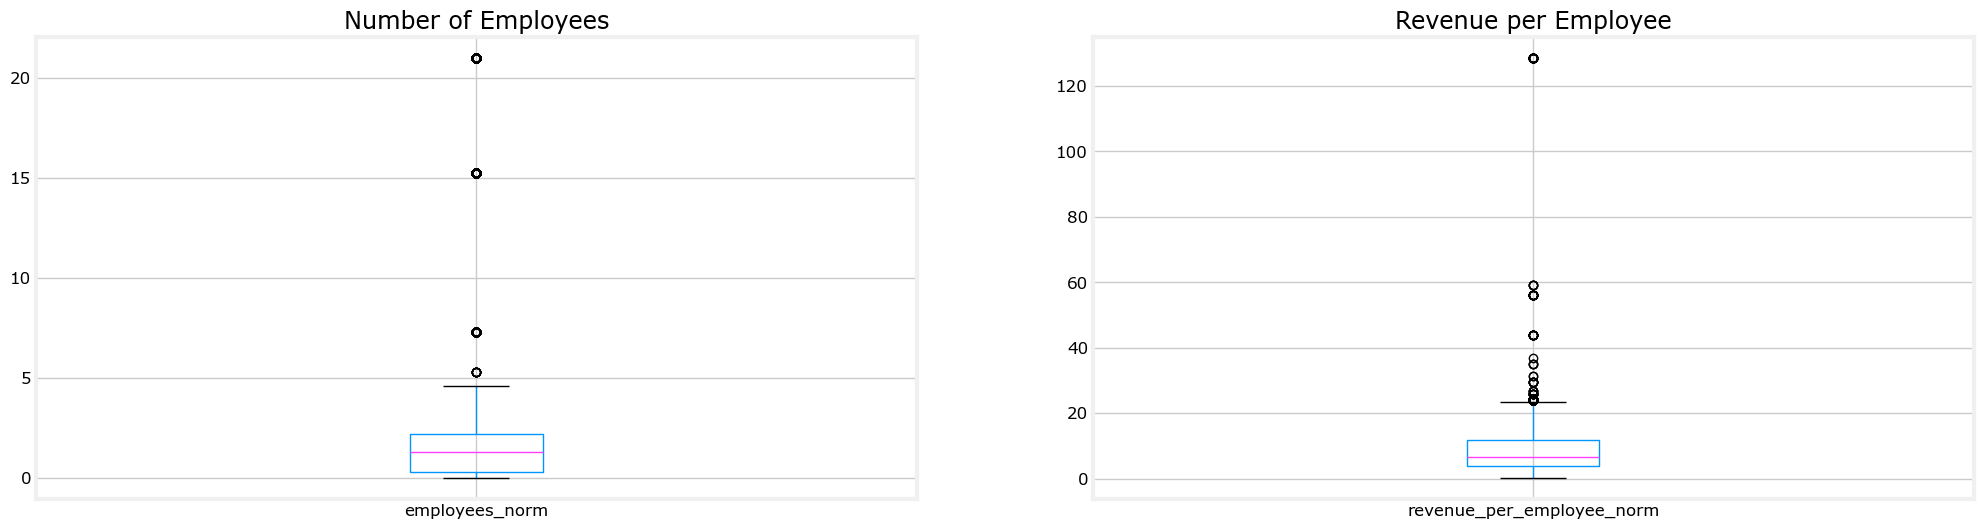

In [1281]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(25)

public_companies.boxplot(column='employees_norm', ax=ax[0])
ax[0].set_title('Number of Employees')

public_companies.boxplot(column='revenue_per_employee_norm', ax=ax[1])
ax[1].set_title('Revenue per Employee')

plt.show()

In [1282]:
#remove outliers
public_companies = removeOutliersIQR(public_companies, 'employees_norm')
public_companies = removeOutliersIQR(public_companies, 'revenue_per_employee_norm')

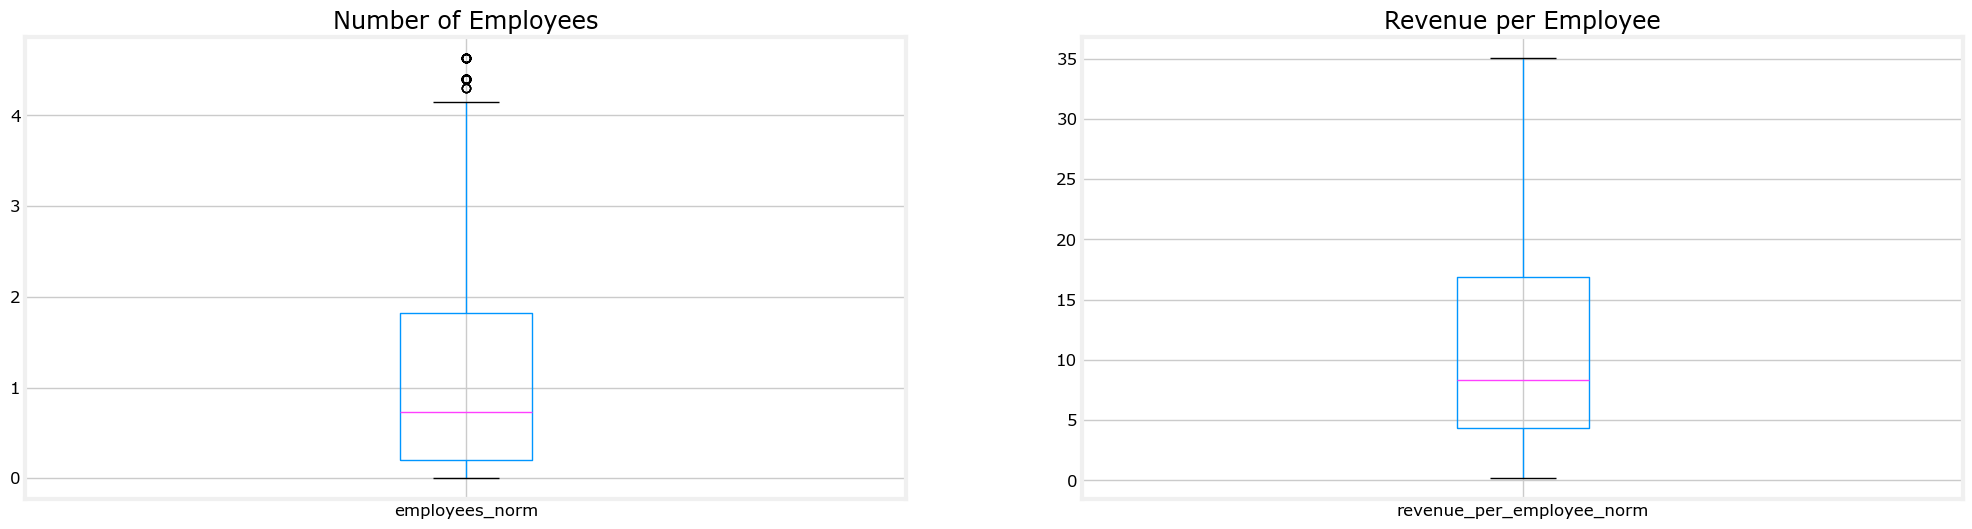

In [1283]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(25)

public_companies.boxplot(column='employees_norm', ax=ax[0])
ax[0].set_title('Number of Employees')

public_companies.boxplot(column='revenue_per_employee_norm', ax=ax[1])
ax[1].set_title('Revenue per Employee')

plt.show()

In [1284]:
public_companies[['employees_norm', 'revenue_per_employee_norm']].describe()

,employees_norm,revenue_per_employee_norm
count,10961.000000,10961.000000
mean,1.092180,10.006479
std,0.939986,6.506627
min,0.000810,0.183870
25%,0.203000,4.345190
50%,0.726820,8.335420
75%,1.823810,16.854500
max,4.631000,35.045410


# Categorical Data

In [1285]:
public_companies[['education', 'race', 'sex', 'title', 'mc_group', 'sector']].describe()

,education,race,sex,title,mc_group,sector
count,10961,10961,10961,10961,10961,10961
unique,5,5,3,15,6,11
top,Bachelor's Degree,Asian,Male,Software Engineer,Mega-Cap,Technology
freq,5293,5728,8625,6918,5587,5714


In [1286]:
public_companies.groupby('mc_group')['base_salary_norm'].count()

mc_group
Large-Cap    4306
Mega-Cap     5587
Micro-Cap      27
Mid-Cap       802
Nano-Cap       22
Small-Cap     217
Name: base_salary_norm, dtype: int64

In [1287]:
public_companies.groupby('sector')['base_salary_norm'].count()

sector
Communication Services    2508
Consumer Discretionary     790
Consumer Staples            79
Energy                       8
Financials                1219
Healthcare                 185
Industrials                415
Materials                    5
Real Estate                 32
Technology                5714
Utilities                    6
Name: base_salary_norm, dtype: int64

In [1288]:
# removing data entries belonging to category values with less than 30 observations
public_companies = public_companies.drop(public_companies[public_companies['mc_group'] == 'Micro-Cap'].index)
public_companies = public_companies.drop(public_companies[public_companies['mc_group'] == 'Nano-Cap'].index)

public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Energy'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Materials'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Utilities'].index)

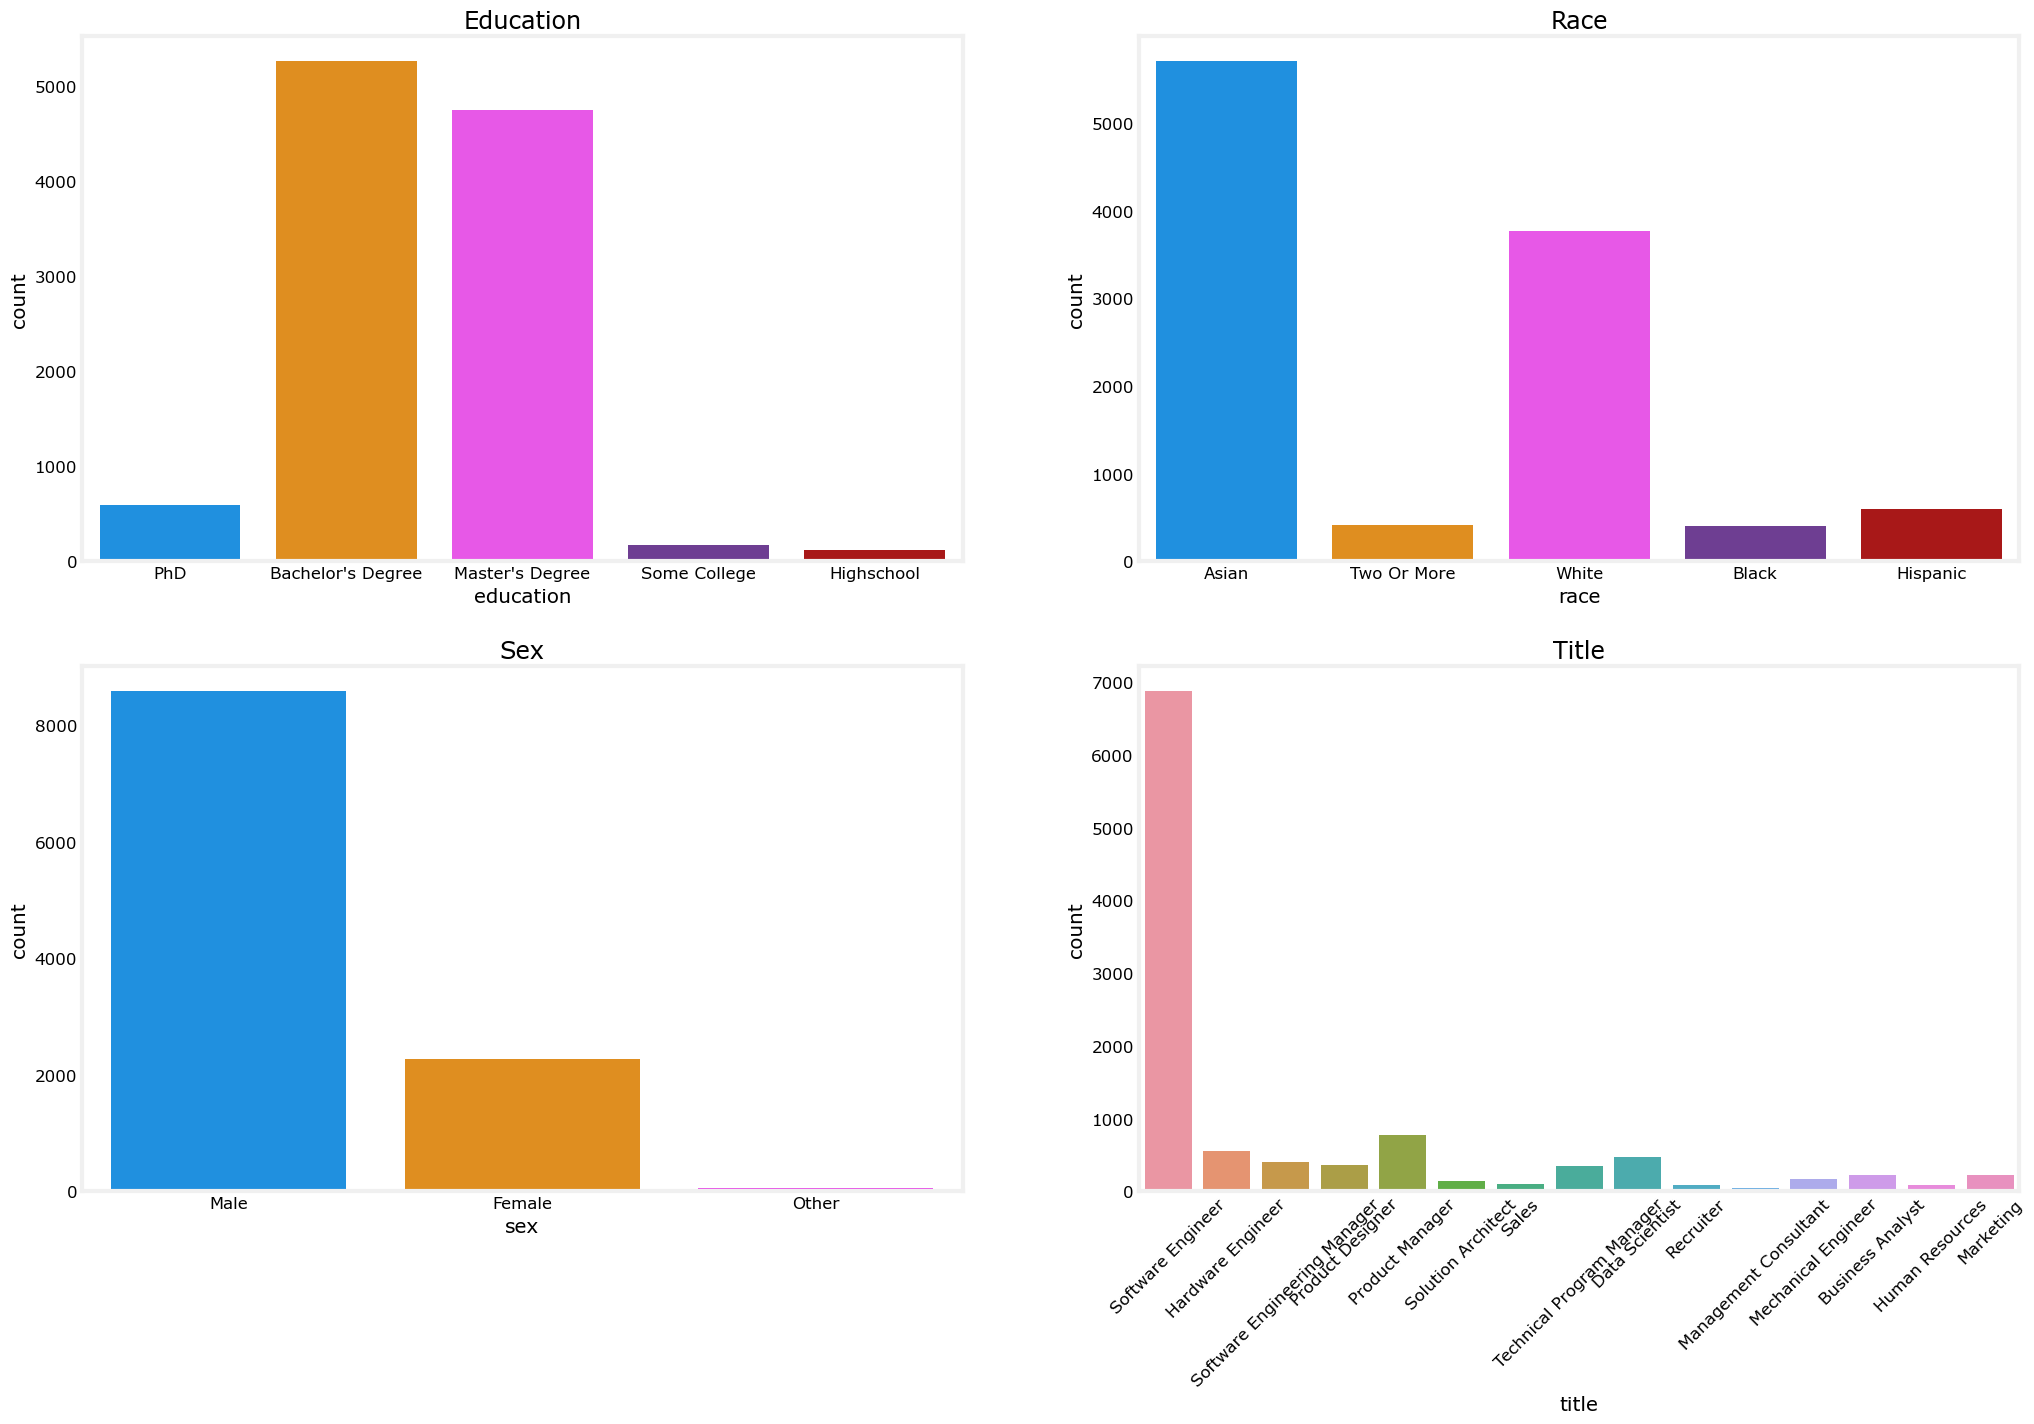

In [1289]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(25)

sns.countplot(x='education', data=public_companies, ax=ax[0, 0])
ax[0, 0].set_title('Education')

sns.countplot(x='race', data=public_companies, ax=ax[0, 1])
ax[0, 1].set_title('Race')

sns.countplot(x='sex', data=public_companies, ax=ax[1, 0])
ax[1, 0].set_title('Sex')

sns.countplot(x='title', data=public_companies, ax=ax[1, 1])
ax[1, 1].set_title('Title')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)


plt.show()

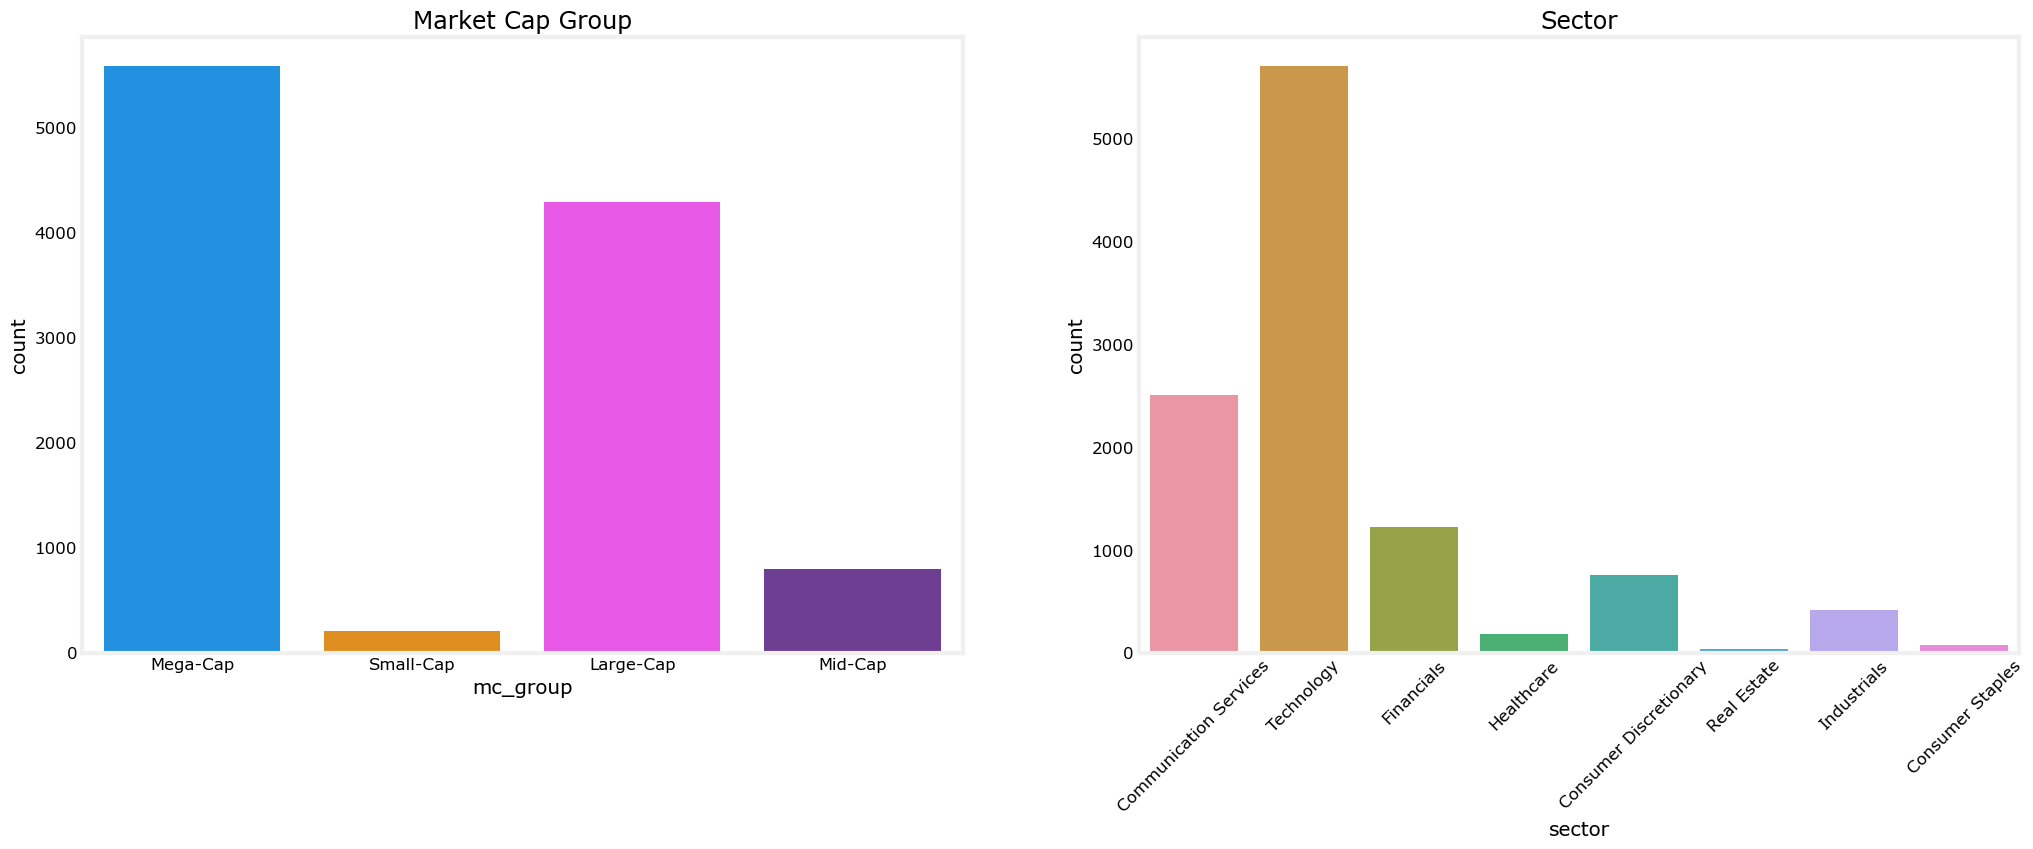

In [1290]:
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

sns.countplot(x='mc_group', data=public_companies, ax=ax[0])
ax[0].set_title('Market Cap Group')

sns.countplot(x='sector', data=public_companies, ax=ax[1])
ax[1].set_title('Sector')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


plt.show()

# Categorical Data Encoding

In [1291]:
public_companies_copy = public_companies
x=['education', 'title', 'race', 'sex', 'mc_group', 'sector']
public_companies = pd.get_dummies(public_companies, columns=['education', 'title', 'race', 'sex', 'mc_group', 'sector'], prefix=x, drop_first=True, dtype=int)

public_companies.loc[:, 'title_Data Scientist':'sector_Technology'].sample(3)

,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,...,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology
13941,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3575,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Correlation Analysis

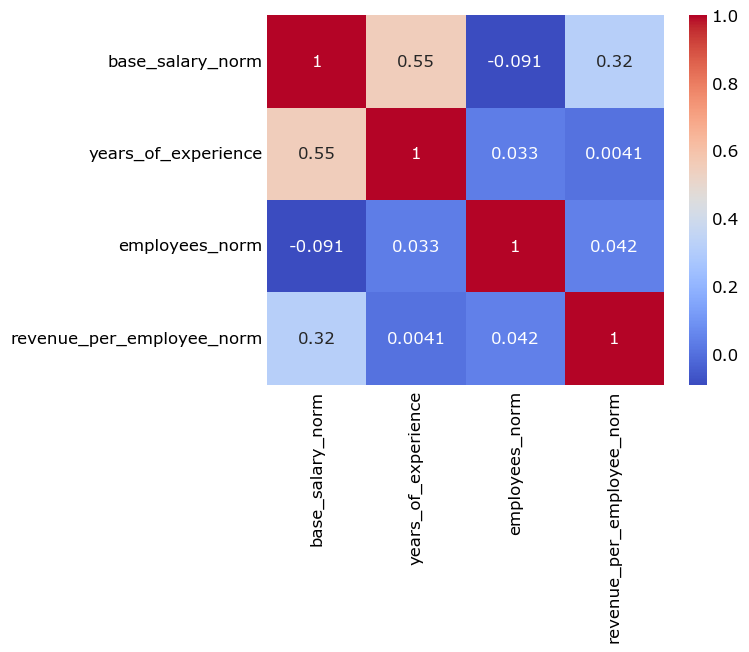

In [1292]:
public_companies_cleaned = public_companies[['base_salary_norm', 'years_of_experience',
                                             'employees_norm', 'revenue_per_employee_norm']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

![multiple](multiple.png) 

# Split Dataset

In [1158]:
X = public_companies.drop(['base_salary_norm'], axis=1)
X.head(3)

,years_of_experience,employees_norm,revenue_per_employee_norm,education_Highschool,education_Master's Degree,education_PhD,education_Some College,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology
0,5,1.82381,16.85450,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,2.21000,10.29787,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,6,1.82381,16.85450,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1159]:
y = public_companies['base_salary_norm']
y.head(3)

0    2.10
1    1.24
2    1.77
Name: base_salary_norm, dtype: float64

In [1160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [1161]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Multivariate Linear Regression Modeling

## Analyze Removal of Quantitative Variables

Our goal is to evaluate quantitative variables based on p-value.  Those with a p-value over .05 will be eliminated from the model.  This will be done one by one with the maximum p-value being removed on each iteration.

In [1293]:
lm1 = sm.OLS(y_train, X_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       base_salary_norm   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:06   Log-Likelihood:                -534.47
No. Observations:                7625   AIC:                             1145.
Df Residuals:                    7587   BIC:                             1409.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1294]:
y_pred = lm1.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.06672111741595647
Linear Regression - MAE: 0.19770178474898495


# Analyze Removal of Categorical Variables

Here we will be test building a model without each of the categorical variables with replacement.  We expect the overall fit of the model to decrease with each variable removed, however those with little impact on the overall fit will be removed from the variables of interest to maximize the effect of the most significant variables.

## Test Removing Education

In [1295]:
X_train1 = X_train.drop(columns=['education_Highschool', 'education_Some College', 'education_Master\'s Degree', 'education_PhD'], inplace=False)
X_test1 = X_test.drop(columns=['education_Highschool', 'education_Some College', 'education_Master\'s Degree', 'education_PhD'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:10   Log-Likelihood:                -697.53
No. Observations:                7625   AIC:                             1463.
Df Residuals:                    7591   BIC:                             1699.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9166      0.025     36.873      0.000       0.868       0.965
years_of_experience                    0.0399      0.001     61.134      0.000       0.039       0.041
employees_norm                        -0.0664      0.004    -16.249      0.000      -0.074      -0.058
revenue_per_employee_norm              0.0106      0.001     16.668      0.000       0.009       0.012
title_Data Scientist                   0.3548      0.026     13.735      0.000       0.304       0.405
title_Hardware Engineer                0.2087      0.025      8.238      0.000       0.159       0.258
title_Human Resources                  0.0833      0.039      2.121      0.034       0.006       0.160
title_Management Consultant            0.1778      0.047      3.763      0.000       0.085       0.270
title_Marketing                        0.1317      0.030      4.378      0.000       0.073       0.191
title_Mechanical Engineer              0.1730      0.033      5.237      0.000       0.108       0.238
title_Product Designer                 0.2857      0.027     10.427      0.000       0.232       0.339
title_Product Manager                  0.3051      0.024     12.677      0.000       0.258       0.352
title_Recruiter                       -0.0230      0.039     -0.582      0.561      -0.100       0.054
title_Sales                           -0.0049      0.038     -0.128      0.898      -0.079       0.070
title_Software Engineer                0.2903      0.022     13.420      0.000       0.248       0.333
title_Software Engineering Manager     0.4373      0.027     16.285      0.000       0.385       0.490
title_Solution Architect               0.1853      0.034      5.385      0.000       0.118       0.253
title_Technical Program Manager        0.2202      0.027      8.024      0.000       0.166       0.274
race_Black                            -0.0931      0.016     -5.687      0.000      -0.125      -0.061
race_Hispanic                         -0.0654      0.014     -4.730      0.000      -0.092      -0.038
race_Two Or More                       0.0054      0.017      0.323      0.746      -0.027       0.038
race_White                            -0.0179      0.007     -2.608      0.009      -0.031      -0.004
sex_Male                               0.0297      0.008      3.791      0.000       0.014       0.045
sex_Other                             -0.0377      0.048     -0.778      0.437      -0.133       0.057
mc_group_Mega-Cap                      0.0843      0.009      9.295      0.000       0.067       0.102
mc_group_Mid-Cap                       0.0355      0.013      2.741      0.006       0.010       0.061
mc_group_Small-Cap                     0.0418      0.023      1.793      0.073      -0.004      

### Result
>Removing education decreased r^2 and adjusted r^2 by .016.

In [1296]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.06952071073548072
Linear Regression - MAE: 0.20183612881289764


# Test Removing Sex

In [1297]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male'], inplace=False)
X_test1 = X_test.drop(columns=['sex_Other', 'sex_Male'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:13   Log-Likelihood:                -540.89
No. Observations:                7625   AIC:                             1154.
Df Residuals:                    7589   BIC:                             1404.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9067      0.024     37.613      0.000       0.859       0.954
years_of_experience                    0.0395      0.001     61.499      0.000       0.038       0.041
employees_norm                        -0.0665      0.004    -16.602      0.000      -0.074      -0.059
revenue_per_employee_norm              0.0100      0.001     16.054      0.000       0.009       0.011
education_Highschool                   0.0134      0.028      0.478      0.633      -0.041       0.068
education_Master's Degree              0.0572      0.007      8.414      0.000       0.044       0.070
education_PhD                          0.2480      0.014     17.563      0.000       0.220       0.276
education_Some College                -0.0482      0.024     -1.988      0.047      -0.096      -0.001
title_Data Scientist                   0.2877      0.026     11.246      0.000       0.238       0.338
title_Hardware Engineer                0.1682      0.025      6.752      0.000       0.119       0.217
title_Human Resources                  0.0710      0.038      1.849      0.065      -0.004       0.146
title_Management Consultant            0.1697      0.046      3.666      0.000       0.079       0.260
title_Marketing                        0.1250      0.029      4.247      0.000       0.067       0.183
title_Mechanical Engineer              0.1550      0.032      4.789      0.000       0.092       0.218
title_Product Designer                 0.2774      0.027     10.348      0.000       0.225       0.330
title_Product Manager                  0.3000      0.024     12.717      0.000       0.254       0.346
title_Recruiter                       -0.0136      0.039     -0.351      0.725      -0.089       0.062
title_Sales                            0.0044      0.037      0.117      0.907      -0.069       0.077
title_Software Engineer                0.2876      0.021     13.587      0.000       0.246       0.329
title_Software Engineering Manager     0.4316      0.026     16.408      0.000       0.380       0.483
title_Solution Architect               0.1883      0.034      5.586      0.000       0.122       0.254
title_Technical Program Manager        0.2126      0.027      7.907      0.000       0.160       0.265
race_Black                            -0.0735      0.016     -4.556      0.000      -0.105      -0.042
race_Hispanic                         -0.0408      0.014     -2.972      0.003      -0.068      -0.014
race_Two Or More                       0.0207      0.016      1.270      0.204      -0.011       0.053
race_White                            -0.0003      0.007     -0.041      0.967      -0.014       0.014
mc_group_Mega-Cap                      0.0816      0.009      9.180      0.000       0.064      

### Result
>Removing sex decreased r^2 and adjusted r^2 by .001.  We can conlude based on this that sex is not a significant variable to the model.

In [1298]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.06668217419568079
Linear Regression - MAE: 0.19767500862889376


# Test Removing Race

In [1299]:
X_train1 = X_train.drop(columns=['race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
X_test1 = X_test.drop(columns=['race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:21   Log-Likelihood:                -551.27
No. Observations:                7625   AIC:                             1171.
Df Residuals:                    7591   BIC:                             1406.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8865      0.024     36.393      0.000       0.839       0.934
years_of_experience                    0.0394      0.001     61.430      0.000       0.038       0.041
employees_norm                        -0.0685      0.004    -17.168      0.000      -0.076      -0.061
revenue_per_employee_norm              0.0100      0.001     16.002      0.000       0.009       0.011
education_Highschool                   0.0122      0.028      0.434      0.664      -0.043       0.067
education_Master's Degree              0.0595      0.006      9.231      0.000       0.047       0.072
education_PhD                          0.2498      0.014     17.692      0.000       0.222       0.277
education_Some College                -0.0521      0.024     -2.151      0.031      -0.100      -0.005
title_Data Scientist                   0.2880      0.026     11.244      0.000       0.238       0.338
title_Hardware Engineer                0.1643      0.025      6.581      0.000       0.115       0.213
title_Human Resources                  0.0681      0.038      1.773      0.076      -0.007       0.143
title_Management Consultant            0.1655      0.046      3.574      0.000       0.075       0.256
title_Marketing                        0.1262      0.029      4.282      0.000       0.068       0.184
title_Mechanical Engineer              0.1528      0.032      4.714      0.000       0.089       0.216
title_Product Designer                 0.2815      0.027     10.463      0.000       0.229       0.334
title_Product Manager                  0.3018      0.024     12.777      0.000       0.255       0.348
title_Recruiter                       -0.0095      0.039     -0.244      0.807      -0.085       0.067
title_Sales                            0.0011      0.037      0.030      0.976      -0.072       0.074
title_Software Engineer                0.2849      0.021     13.424      0.000       0.243       0.326
title_Software Engineering Manager     0.4310      0.026     16.357      0.000       0.379       0.483
title_Solution Architect               0.1830      0.034      5.422      0.000       0.117       0.249
title_Technical Program Manager        0.2158      0.027      8.014      0.000       0.163       0.269
sex_Male                               0.0243      0.008      3.163      0.002       0.009       0.039
sex_Other                             -0.0364      0.047     -0.767      0.443      -0.130       0.057
mc_group_Mega-Cap                      0.0826      0.009      9.286      0.000       0.065       0.100
mc_group_Mid-Cap                       0.0410      0.013      3.234      0.001       0.016       0.066
mc_group_Small-Cap                     0.0471      0.023      2.063      0.039       0.002      

### Result
>Removing race decreased r^2 and adjusted r^2 by .003 indicating race is not a significant variable to the model.

In [1300]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.0666608167612155
Linear Regression - MAE: 0.19768396222296458


# Test Removing Sector

In [1301]:
X_train1 = X_train.drop(columns=['sector_Consumer Discretionary',
                                 'sector_Consumer Staples', 'sector_Financials', 'sector_Healthcare', 
                                 'sector_Industrials', 'sector_Technology'], inplace=False)
X_test1 = X_test.drop(columns=['sector_Consumer Discretionary',
                                 'sector_Consumer Staples', 'sector_Financials', 'sector_Healthcare', 
                                 'sector_Industrials', 'sector_Technology'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:23   Log-Likelihood:                -734.90
No. Observations:                7625   AIC:                             1534.
Df Residuals:                    7593   BIC:                             1756.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.7448      0.023     31.935      0.000       0.699       0.791
years_of_experience                    0.0397      0.001     60.197      0.000       0.038       0.041
employees_norm                        -0.0692      0.004    -17.427      0.000      -0.077      -0.061
revenue_per_employee_norm              0.0129      0.001     21.910      0.000       0.012       0.014
education_Highschool                   0.0180      0.029      0.624      0.532      -0.038       0.074
education_Master's Degree              0.0622      0.007      8.939      0.000       0.049       0.076
education_PhD                          0.2631      0.014     18.194      0.000       0.235       0.291
education_Some College                -0.0366      0.025     -1.472      0.141      -0.085       0.012
title_Data Scientist                   0.2983      0.026     11.383      0.000       0.247       0.350
title_Hardware Engineer                0.1865      0.025      7.371      0.000       0.137       0.236
title_Human Resources                  0.1042      0.039      2.641      0.008       0.027       0.181
title_Management Consultant            0.1731      0.047      3.654      0.000       0.080       0.266
title_Marketing                        0.1665      0.030      5.522      0.000       0.107       0.226
title_Mechanical Engineer              0.1136      0.033      3.456      0.001       0.049       0.178
title_Product Designer                 0.3125      0.028     11.363      0.000       0.259       0.366
title_Product Manager                  0.3217      0.024     13.317      0.000       0.274       0.369
title_Recruiter                        0.0285      0.040      0.717      0.473      -0.049       0.106
title_Sales                            0.0477      0.038      1.252      0.210      -0.027       0.122
title_Software Engineer                0.3039      0.022     14.013      0.000       0.261       0.346
title_Software Engineering Manager     0.4440      0.027     16.467      0.000       0.391       0.497
title_Solution Architect               0.2135      0.034      6.189      0.000       0.146       0.281
title_Technical Program Manager        0.2358      0.028      8.569      0.000       0.182       0.290
race_Black                            -0.0815      0.017     -4.930      0.000      -0.114      -0.049
race_Hispanic                         -0.0442      0.014     -3.137      0.002      -0.072      -0.017
race_Two Or More                       0.0222      0.017      1.325      0.185      -0.011       0.055
race_White                            -0.0043      0.007     -0.595      0.552      -0.019       0.010
sex_Male                               0.0221      0.008      2.804      0.005       0.007      

### Result
>Removing sector decreased r^2 and adjusted r^2 by .021.

In [1302]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.0703232272639289
Linear Regression - MAE: 0.2042447888444053


# Test Removing Market Cap Group

In [1303]:
X_train1 = X_train.drop(columns=['mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
X_test1 = X_test.drop(columns=['mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     243.5
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:25   Log-Likelihood:                -580.41
No. Observations:                7625   AIC:                             1231.
Df Residuals:                    7590   BIC:                             1474.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8984      0.025     36.569      0.000       0.850       0.947
years_of_experience                    0.0393      0.001     60.563      0.000       0.038       0.041
employees_norm                        -0.0516      0.003    -15.641      0.000      -0.058      -0.045
revenue_per_employee_norm              0.0127      0.001     23.458      0.000       0.012       0.014
education_Highschool                   0.0113      0.028      0.400      0.689      -0.044       0.067
education_Master's Degree              0.0575      0.007      8.430      0.000       0.044       0.071
education_PhD                          0.2473      0.014     17.417      0.000       0.219       0.275
education_Some College                -0.0469      0.024     -1.924      0.054      -0.095       0.001
title_Data Scientist                   0.2829      0.026     11.004      0.000       0.233       0.333
title_Hardware Engineer                0.1496      0.025      5.977      0.000       0.101       0.199
title_Human Resources                  0.0758      0.039      1.960      0.050   -1.92e-06       0.152
title_Management Consultant            0.1710      0.047      3.676      0.000       0.080       0.262
title_Marketing                        0.1258      0.030      4.247      0.000       0.068       0.184
title_Mechanical Engineer              0.1464      0.033      4.498      0.000       0.083       0.210
title_Product Designer                 0.2837      0.027     10.507      0.000       0.231       0.337
title_Product Manager                  0.3016      0.024     12.724      0.000       0.255       0.348
title_Recruiter                       -0.0037      0.039     -0.095      0.925      -0.080       0.073
title_Sales                            0.0088      0.037      0.235      0.814      -0.065       0.082
title_Software Engineer                0.2844      0.021     13.357      0.000       0.243       0.326
title_Software Engineering Manager     0.4284      0.026     16.205      0.000       0.377       0.480
title_Solution Architect               0.1865      0.034      5.504      0.000       0.120       0.253
title_Technical Program Manager        0.2183      0.027      8.077      0.000       0.165       0.271
race_Black                            -0.0766      0.016     -4.725      0.000      -0.108      -0.045
race_Hispanic                         -0.0447      0.014     -3.239      0.001      -0.072      -0.018
race_Two Or More                       0.0188      0.016      1.144      0.253      -0.013       0.051
race_White                            -0.0024      0.007     -0.335      0.737      -0.016       0.012
sex_Male                               0.0244      0.008      3.154      0.002       0.009      

### Result
>Removing market cap group decreased r^2 by .002 and adjusted r^2 by .001 indicating market cap group is not significant to the model.

In [1304]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.06709749948462404
Linear Regression - MAE: 0.19833650522814872


# Test Removing Title

In [1305]:
X_train1 = X_train.drop(columns=['title_Data Scientist', 'title_Hardware Engineer', 'title_Human Resources', 
                                 'title_Management Consultant', 'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                 'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                 'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager'], inplace=False)
X_test1 = X_test.drop(columns=['title_Data Scientist', 'title_Hardware Engineer', 'title_Human Resources', 
                                 'title_Management Consultant', 'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                 'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                 'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     315.8
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:30   Log-Likelihood:                -835.77
No. Observations:                7625   AIC:                             1720.
Df Residuals:                    7601   BIC:                             1886.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.1513      0.014     81.044      0.000       1.123       1.179
years_of_experience               0.0390      0.001     62.746      0.000       0.038       0.040
employees_norm                   -0.0666      0.004    -16.019      0.000      -0.075      -0.058
revenue_per_employee_norm         0.0094      0.001     14.721      0.000       0.008       0.011
education_Highschool              0.0190      0.029      0.654      0.513      -0.038       0.076
education_Master's Degree         0.0577      0.007      8.267      0.000       0.044       0.071
education_PhD                     0.2459      0.014     17.393      0.000       0.218       0.274
education_Some College           -0.0387      0.025     -1.536      0.125      -0.088       0.011
race_Black                       -0.1000      0.017     -6.007      0.000      -0.133      -0.067
race_Hispanic                    -0.0531      0.014     -3.732      0.000      -0.081      -0.025
race_Two Or More                  0.0143      0.017      0.843      0.399      -0.019       0.048
race_White                       -0.0101      0.007     -1.379      0.168      -0.024       0.004
sex_Male                          0.0439      0.008      5.740      0.000       0.029       0.059
sex_Other                        -0.0199      0.049     -0.402      0.687      -0.117       0.077
mc_group_Mega-Cap                 0.0865      0.009      9.429      0.000       0.069       0.105
mc_group_Mid-Cap                  0.0583      0.013      4.437      0.000       0.033       0.084
mc_group_Small-Cap                0.0699      0.024      2.954      0.003       0.024       0.116
sector_Consumer Discretionary    -0.1158      0.014     -7.991      0.000      -0.144      -0.087
sector_Consumer Staples          -0.0448      0.042     -1.066      0.286      -0.127       0.038
sector_Financials                -0.1874      0.012    -15.057      0.000      -0.212      -0.163
sector_Healthcare                -0.1618      0.025     -6.440      0.000      -0.211      -0.113
sector_Industrials               -0.3023      0.018    -16.354      0.000      -0.339      -0.266
sector_Real Estate               -0.1345      0.058     -2.327      0.020      -0.248      -0.021
sector_Technology                -0.0737      0.009     -8.608      0.000      -0.091      -0.057
==============================================================================
Omnibus:                       68.554   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.781
Skew:                           0.082   Prob(JB):                     4.80e-23
Kurtosis:                       3.545   Cond. No.                         255.
==========================================

### Result
>Removing title decreased r^2 by .042 and adjusted r^2 by .041.

In [1306]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.07194975796242213
Linear Regression - MAE: 0.20644977131439915


# Test Removing Combinations of Categorical Variables

In [1307]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
X_test1 = X_test.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:34   Log-Likelihood:                -586.18
No. Observations:                7625   AIC:                             1238.
Df Residuals:                    7592   BIC:                             1467.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9133      0.024     37.850      0.000       0.866       0.961
years_of_experience                    0.0396      0.001     61.221      0.000       0.038       0.041
employees_norm                        -0.0516      0.003    -15.637      0.000      -0.058      -0.045
revenue_per_employee_norm              0.0127      0.001     23.463      0.000       0.012       0.014
education_Highschool                   0.0131      0.028      0.467      0.640      -0.042       0.068
education_Master's Degree              0.0577      0.007      8.449      0.000       0.044       0.071
education_PhD                          0.2489      0.014     17.531      0.000       0.221       0.277
education_Some College                -0.0452      0.024     -1.853      0.064      -0.093       0.003
title_Data Scientist                   0.2844      0.026     11.056      0.000       0.234       0.335
title_Hardware Engineer                0.1541      0.025      6.164      0.000       0.105       0.203
title_Human Resources                  0.0670      0.039      1.734      0.083      -0.009       0.143
title_Management Consultant            0.1681      0.047      3.613      0.000       0.077       0.259
title_Marketing                        0.1203      0.030      4.066      0.000       0.062       0.178
title_Mechanical Engineer              0.1505      0.033      4.625      0.000       0.087       0.214
title_Product Designer                 0.2773      0.027     10.293      0.000       0.225       0.330
title_Product Manager                  0.2999      0.024     12.645      0.000       0.253       0.346
title_Recruiter                       -0.0128      0.039     -0.328      0.743      -0.089       0.063
title_Sales                            0.0084      0.037      0.225      0.822      -0.065       0.082
title_Software Engineer                0.2876      0.021     13.519      0.000       0.246       0.329
title_Software Engineering Manager     0.4309      0.026     16.298      0.000       0.379       0.483
title_Solution Architect               0.1898      0.034      5.602      0.000       0.123       0.256
title_Technical Program Manager        0.2160      0.027      7.990      0.000       0.163       0.269
race_Black                            -0.0760      0.016     -4.684      0.000      -0.108      -0.044
race_Hispanic                         -0.0424      0.014     -3.071      0.002      -0.069      -0.015
race_Two Or More                       0.0176      0.016      1.071      0.284      -0.015       0.050
race_White                            -0.0013      0.007     -0.180      0.857      -0.015       0.013
sector_Consumer Discretionary         -0.1265      0.014     -9.208      0.000      -0.153      

### Result
>Removing sex and market cap group decreased r^2 and adjusted r^2 by .003 indicating these variables are not significant to the model.

In [1308]:
X_trainFinalLR = X_train.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
X_test1FinalLR = X_test.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:37   Log-Likelihood:                -586.18
No. Observations:                7625   AIC:                             1238.
Df Residuals:                    7592   BIC:                             1467.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9133      0.024     37.850      0.000       0.866       0.961
years_of_experience                    0.0396      0.001     61.221      0.000       0.038       0.041
employees_norm                        -0.0516      0.003    -15.637      0.000      -0.058      -0.045
revenue_per_employee_norm              0.0127      0.001     23.463      0.000       0.012       0.014
education_Highschool                   0.0131      0.028      0.467      0.640      -0.042       0.068
education_Master's Degree              0.0577      0.007      8.449      0.000       0.044       0.071
education_PhD                          0.2489      0.014     17.531      0.000       0.221       0.277
education_Some College                -0.0452      0.024     -1.853      0.064      -0.093       0.003
title_Data Scientist                   0.2844      0.026     11.056      0.000       0.234       0.335
title_Hardware Engineer                0.1541      0.025      6.164      0.000       0.105       0.203
title_Human Resources                  0.0670      0.039      1.734      0.083      -0.009       0.143
title_Management Consultant            0.1681      0.047      3.613      0.000       0.077       0.259
title_Marketing                        0.1203      0.030      4.066      0.000       0.062       0.178
title_Mechanical Engineer              0.1505      0.033      4.625      0.000       0.087       0.214
title_Product Designer                 0.2773      0.027     10.293      0.000       0.225       0.330
title_Product Manager                  0.2999      0.024     12.645      0.000       0.253       0.346
title_Recruiter                       -0.0128      0.039     -0.328      0.743      -0.089       0.063
title_Sales                            0.0084      0.037      0.225      0.822      -0.065       0.082
title_Software Engineer                0.2876      0.021     13.519      0.000       0.246       0.329
title_Software Engineering Manager     0.4309      0.026     16.298      0.000       0.379       0.483
title_Solution Architect               0.1898      0.034      5.602      0.000       0.123       0.256
title_Technical Program Manager        0.2160      0.027      7.990      0.000       0.163       0.269
race_Black                            -0.0760      0.016     -4.684      0.000      -0.108      -0.044
race_Hispanic                         -0.0424      0.014     -3.071      0.002      -0.069      -0.015
race_Two Or More                       0.0176      0.016      1.071      0.284      -0.015       0.050
race_White                            -0.0013      0.007     -0.180      0.857      -0.015       0.013
sector_Consumer Discretionary         -0.1265      0.014     -9.208      0.000      -0.153      

### Result
>Removing sex, market cap group, and race decreased r^2 and adjusted r^2 by .006 indicating these variables are not significant to the model.

In [1309]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.06708557531214962
Linear Regression - MAE: 0.19834691794095563


# Model with Original Dataset Variables Exclusively

> Here we want to analyze the difference between models calculated with the stock dataset and without to compare overall fit.

In [1312]:
X_train.columns

Index(['const', 'years_of_experience', 'employees_norm',
       'revenue_per_employee_norm', 'education_Highschool',
       'education_Master's Degree', 'education_PhD', 'education_Some College',
       'title_Data Scientist', 'title_Hardware Engineer',
       'title_Human Resources', 'title_Management Consultant',
       'title_Marketing', 'title_Mechanical Engineer',
       'title_Product Designer', 'title_Product Manager', 'title_Recruiter',
       'title_Sales', 'title_Software Engineer',
       'title_Software Engineering Manager', 'title_Solution Architect',
       'title_Technical Program Manager', 'race_Black', 'race_Hispanic',
       'race_Two Or More', 'race_White', 'sex_Male', 'sex_Other',
       'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
       'sector_Consumer Discretionary', 'sector_Consumer Staples',
       'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
       'sector_Real Estate', 'sector_Technology'],
      dtype='object')

In [1313]:
X_train2 = X_train.drop(columns=['employees_norm','revenue_per_employee_norm', 
                                 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                 'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                 'sector_Real Estate', 'sector_Technology'], inplace=False)
                                 
       
X_test2 = X_test.drop(columns=['employees_norm','revenue_per_employee_norm', 
                                 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                 'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                 'sector_Real Estate', 'sector_Technology'], inplace=False)
                               
lm1 = sm.OLS(y_train, X_train2)
lm1 = lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:56   Log-Likelihood:                -1485.3
No. Observations:                7625   AIC:                             3023.
Df Residuals:                    7599   BIC:                             3203.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8303      0.025     33.296      0.000       0.781       0.879
years_of_experience                    0.0399      0.001     54.787      0.000       0.038       0.041
education_Highschool                   0.0341      0.032      1.076      0.282      -0.028       0.096
education_Master's Degree              0.0757      0.008      9.888      0.000       0.061       0.091
education_PhD                          0.3193      0.016     20.160      0.000       0.288       0.350
education_Some College                -0.0172      0.027     -0.629      0.529      -0.071       0.036
title_Data Scientist                   0.3203      0.029     11.096      0.000       0.264       0.377
title_Hardware Engineer                0.2196      0.028      7.890      0.000       0.165       0.274
title_Human Resources                  0.1601      0.043      3.684      0.000       0.075       0.245
title_Management Consultant            0.1242      0.052      2.379      0.017       0.022       0.227
title_Marketing                        0.2164      0.033      6.520      0.000       0.151       0.281
title_Mechanical Engineer              0.1271      0.036      3.512      0.000       0.056       0.198
title_Product Designer                 0.3631      0.030     11.996      0.000       0.304       0.422
title_Product Manager                  0.3488      0.027     13.111      0.000       0.297       0.401
title_Recruiter                        0.1326      0.044      3.038      0.002       0.047       0.218
title_Sales                            0.0645      0.042      1.536      0.125      -0.018       0.147
title_Software Engineer                0.3364      0.024     14.096      0.000       0.290       0.383
title_Software Engineering Manager     0.4618      0.030     15.552      0.000       0.404       0.520
title_Solution Architect               0.2263      0.038      5.953      0.000       0.152       0.301
title_Technical Program Manager        0.2967      0.030      9.809      0.000       0.237       0.356
race_Black                            -0.1174      0.018     -6.467      0.000      -0.153      -0.082
race_Hispanic                         -0.0598      0.015     -3.855      0.000      -0.090      -0.029
race_Two Or More                       0.0181      0.019      0.978      0.328      -0.018       0.054
race_White                            -0.0228      0.008     -2.855      0.004      -0.039      -0.007
sex_Male                               0.0214      0.009      2.464      0.014       0.004       0.038
sex_Other                             -0.0214      0.054     -0.397      0.691      -0.127       0.084
==============================================================================
Omnibus:         

In [1316]:
y_pred2 = lm1.predict(X_test2)
lr_mse2 = mean_squared_error(y_test, y_pred2)
lr_mae2 = mean_absolute_error(y_test, y_pred2)
print("Linear Regression - MSE:", lr_mse2)
print("Linear Regression - MAE:", lr_mae2)

Linear Regression - MSE: 0.08771644448398616
Linear Regression - MAE: 0.2328124488180651


# Decision Tree Modeling

In [1188]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train1, y_train)
dt_predictions = dt_model.predict(X_test1)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

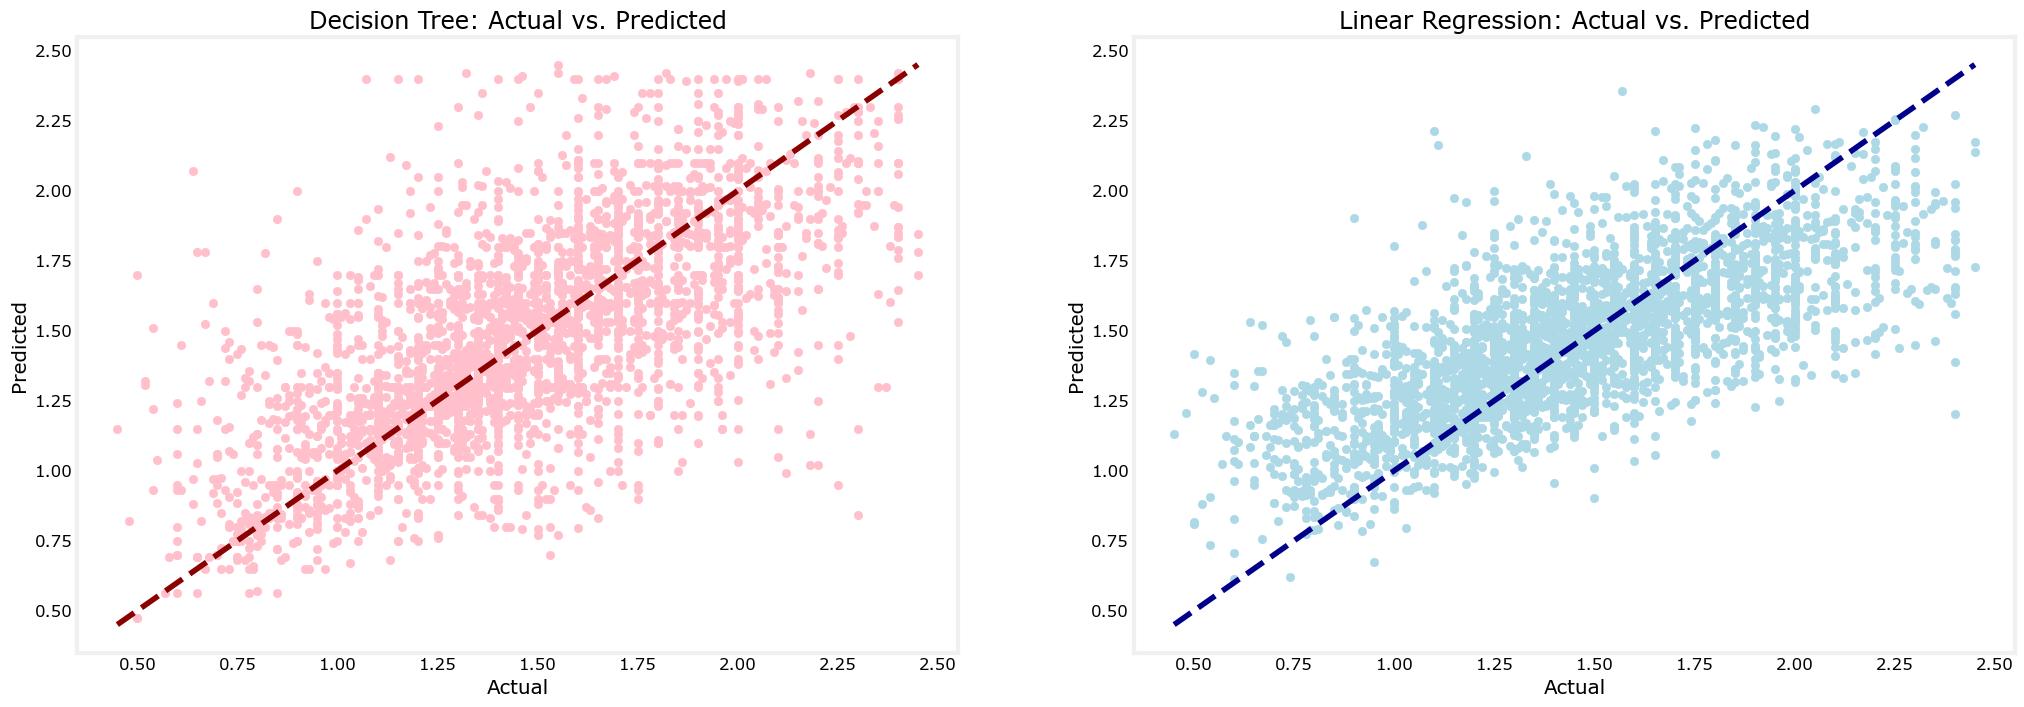

In [1333]:
# plot actual vs. predicted of both models
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

plt.sca(ax[0])
plt.scatter(y_test, dt_predictions, color='pink', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkred', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.sca(ax[1])
plt.scatter(y_test, y_pred, color='lightblue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkblue', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [1189]:
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Decision Tree - MSE:  0.08825405475484621
Decision Tree - MAE:  0.21439325171034046
Linear Regression - MSE: 0.06704495991796022
Linear Regression - MAE: 0.19829575829686397
